<a href="https://colab.research.google.com/github/Rubenvalenzuelaaa/jupyter-exploration./blob/main/ITIA_1378_Midterm_2024_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [4]:
# ==================================================
# Install Necessary Libraries (opcional si tu entorno ya las tiene)
# ==================================================
!pip install tensorflow
!pip install numpy
!pip install matplotlib

# ==================================================
# Imports
# ==================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Reemplazamos 'keras' por 'tensorflow.keras'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# (Opcional) Si deseas usar un modelo pre-entrenado
from tensorflow.keras.applications import MobileNetV2

# ==================================================
# Additional libraries for data loading
# (if using a custom dataset)
# ==================================================
import os
import zipfile

# ==================================================
# Ejemplo de verificación de versión de TensorFlow
# ==================================================
print("TensorFlow version:", tf.__version__)

# ==================================================
# A partir de aquí, iría tu código para cargar datos,
# entrenar el modelo, etc.
# ==================================================


TensorFlow version: 2.18.0


**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [ ]:
# select your dataset
# from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

In [5]:
# =========================================
# 1) Cargar CIFAR-10
# =========================================
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# =========================================
# 2) Normalizar los datos
# =========================================
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

print("Data normalization done!")

# (Opcional) Convertir etiquetas a one-hot encoding para clasificación
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Dataset loaded and ready for training!")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Data normalization done!
Dataset loaded and ready for training!


**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

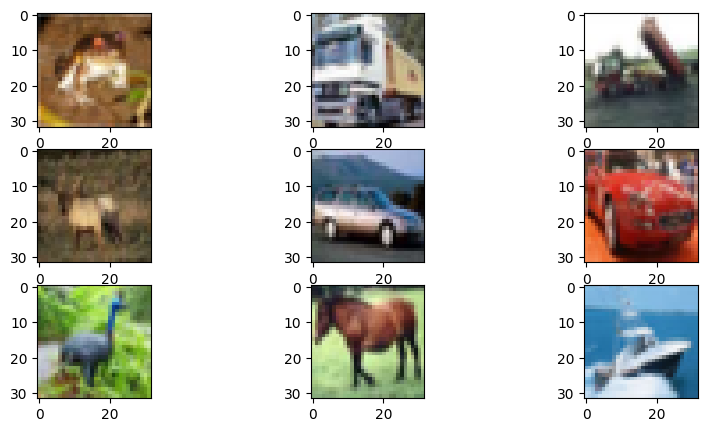

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
Class Distribution (Top 10):
[(np.int64(6), 5000), (np.int64(9), 5000), (np.int64(4), 5000), (np.int64(1), 5000), (np.int64(2), 5000), (np.int64(7), 5000), (np.int64(8), 5000), (np.int64(3), 5000), (np.int64(5), 5000), (np.int64(0), 5000)]


In [6]:
# Insert codode here
# Insert code here to display a few sample images from the dataset
## Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()
#
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [7]:
# Insert code here to normalize images
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images if needed (adjust input_shape in model building accordingly)
# x_train = tf.image.resize(x_train, (224, 224))  # Example for resizing to 224x224
# x_test = tf.image.resize(x_test, (224, 224))

# Insert code here to resize images, if needed

# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

In [16]:
print("sample_images shape:", sample_images.shape)
print("sample_images min:", sample_images.min(), "max:", sample_images.max())


sample_images shape: (5, 32, 32, 3)
sample_images min: 0.0 max: 0.003921569


In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_datagen.fit(x_train)


In [20]:
augmented_images = next(train_datagen.flow(sample_images, batch_size=num_samples))


In [21]:
print("augmented_images shape:", augmented_images.shape)
print("augmented_images min:", augmented_images.min(), "max:", augmented_images.max())



augmented_images shape: (5, 32, 32, 3)
augmented_images min: 0.0 max: 0.003921569


In [23]:
print("sample_images[0][0][0] =", sample_images[0][0][0])
print("sample_images[0][16][16] =", sample_images[0][16][16])


sample_images[0][0][0] = [3.0757405e-05 6.1514809e-05 4.6136101e-05]
sample_images[0][16][16] = [0.00084583 0.0007228  0.00046136]


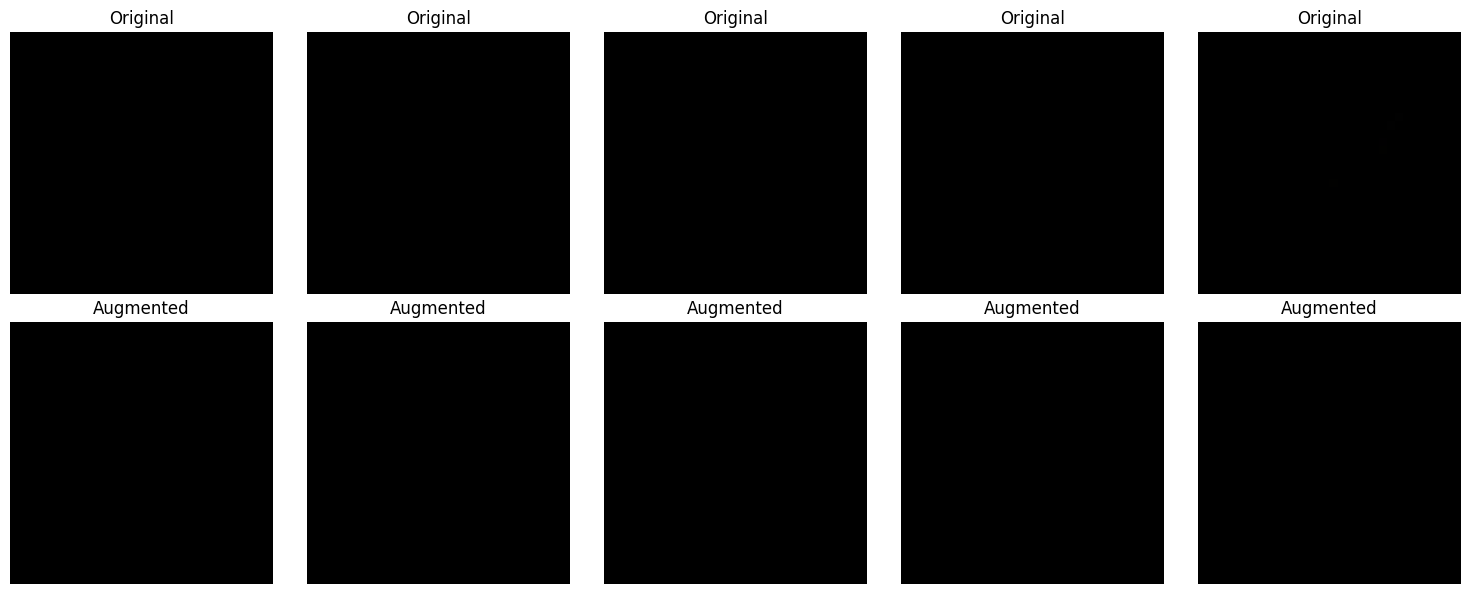

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# =========================================================
# 1) Definir los parámetros de Data Augmentation
# =========================================================
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Rotaciones aleatorias hasta 20 grados
    width_shift_range=0.2,    # Desplazamiento horizontal de hasta 20% del ancho
    height_shift_range=0.2,   # Desplazamiento vertical de hasta 20% de la altura
    horizontal_flip=True,     # Volteo horizontal
    # shear_range=0.2,        # (Opcional) Inclinación
    # zoom_range=0.2          # (Opcional) Zoom aleatorio
)

# =========================================================
# 2) Ajustar (fit) el generador a los datos de entrenamiento
# =========================================================
train_datagen.fit(x_train)

# =========================================================
# 3) Visualizar imágenes originales vs. aumentadas
# =========================================================

# Seleccionamos 5 imágenes al azar del set de entrenamiento
num_samples = 5
indices = np.random.choice(len(x_train), num_samples)
sample_images = x_train[indices]

# Creamos un batch usando el generador
augmented_images = next(train_datagen.flow(sample_images, batch_size=num_samples))

# Creamos una figura para comparar
fig, axs = plt.subplots(2, num_samples, figsize=(15, 6))

for i in range(num_samples):
    # Original
    axs[0, i].imshow(sample_images[i])
    axs[0, i].axis('off')
    axs[0, i].set_title("Original")

    # Augmented
    axs[1, i].imshow(augmented_images[i])
    axs[1, i].axis('off')
    axs[1, i].set_title("Augmented")

plt.tight_layout()
plt.show()



sample_images shape: (5, 32, 32, 3)
sample_images min: 0.0 max: 0.003921569
augmented_images shape: (5, 32, 32, 3)
augmented_images min: 0.0 max: 0.003914907


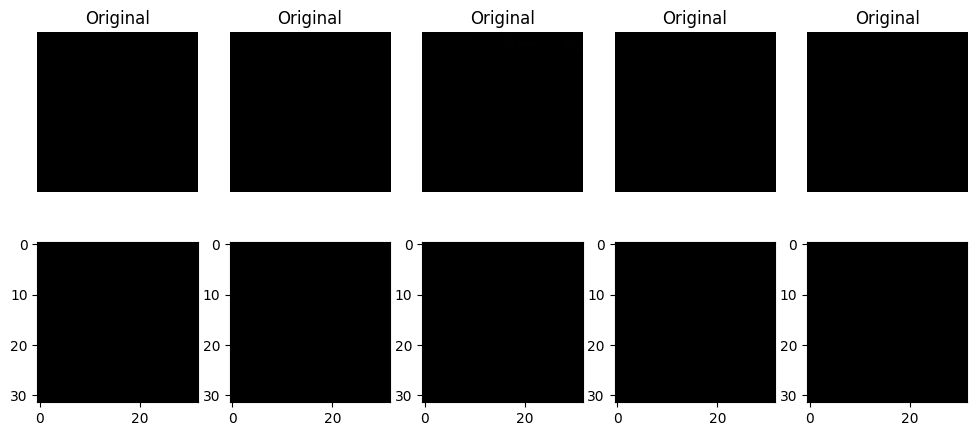

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation con parámetros de ejemplo
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Asegúrate de llamar fit() si usas stats featurewise
train_datagen.fit(x_train)

# Seleccionamos 5 imágenes aleatorias del training set
num_samples = 5
indices = np.random.choice(len(x_train), num_samples)
sample_images = x_train[indices]

# Generamos un batch con augmentations
augmented_images = next(train_datagen.flow(sample_images, batch_size=num_samples))

# Revisa que tengan la forma y valores esperados
print("sample_images shape:", sample_images.shape)
print("sample_images min:", sample_images.min(), "max:", sample_images.max())
print("augmented_images shape:", augmented_images.shape)
print("augmented_images min:", augmented_images.min(), "max:", augmented_images.max())

# Visualizamos en 2 filas: fila 1 (original), fila 2 (augmented)
fig, axs = plt.subplots(2, num_samples, figsize=(12, 5))
for i in range(num_samples):
    axs[0, i].imshow(sample_images[i])
    axs[0, i].axis('off')
    axs[0, i].set_title("Original")

    axs[1, i].imshow(augmented_images[i])


#Model Building (Transfer Learning)

In [13]:
# ==========================================
# Imports
# ==========================================
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Si usarás preprocesamiento especial de VGG16:
from tensorflow.keras.applications.vgg16 import preprocess_input


In [14]:
# Número de clases de CIFAR-10 (o las que tengas en tu dataset)
num_classes = 10

# Cargamos la base de VGG16 con pesos de ImageNet, sin la parte fully-connected
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelamos todas las capas del modelo base para no reentrenarlas
for layer in base_model.layers:
    layer.trainable = False

# Añadimos nuestras capas "top"
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # opcional, para regularizar
predictions = Dense(num_classes, activation='softmax')(x)

# Construimos el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilamos
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Model Training




In [ ]:
# ============================================
# 1) IMPORTS
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# ============================================
# 2) CARGAR CIFAR-10
# ============================================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Convertir a float32 y normalizar a [0, 1] (opcional, pues usaremos preprocess_input después)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

# ============================================
# 3) REDIMENSIONAR A 224x224
# ============================================
# VGG16 espera (224, 224, 3)
def resize_images(images, size=(224,224)):
    resized = []
    for img in images:
        r_img = cv2.resize(img, size)  # redimensionar cada imagen
        resized.append(r_img)
    return np.array(resized)

x_train_resized = resize_images(x_train, (224,224))
x_test_resized  = resize_images(x_test, (224,224))

print("x_train_resized shape:", x_train_resized.shape)
print("x_test_resized shape:", x_test_resized.shape)

# ============================================
# 4) PREPROCESAR PARA VGG16
# ============================================
# Aplica la función de preprocesamiento oficial de VGG16 (ajusta colores al estilo ImageNet)
x_train_resized = preprocess_input(x_train_resized)
x_test_resized  = preprocess_input(x_test_resized)

# ============================================
# 5) DEFINIR VGG16 PRE-ENTRENADO
# ============================================
# include_top=False quita la parte fully-connected original
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Congelamos (freezing) todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadimos nuestras capas personalizadas al final
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Construir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# ============================================
# 6) DATA AUGMENTATION (OPCIONAL)
# ============================================
# Si no quieres data augmentation, sáltate esta parte y usa model.fit(...) con x_train_resized, y_train directamente.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_datagen.fit(x_train_resized)

# Generador de datos de entrenamiento
batch_size = 32
train_generator = train_datagen.flow(x_train_resized, y_train, batch_size=batch_size)

# Para validación, sin augmentations
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(x_test_resized, y_test, batch_size=batch_size)

# ============================================
# 7) ENTRENAMIENTO
# ============================================
# Guardar el mejor modelo según val_loss
checkpoint = ModelCheckpoint('best_model_vgg16.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

epochs = 5  # Ajusta según tu tiempo y recursos

history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train_resized) // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(x_test_resized) // batch_size,
    callbacks=[checkpoint]
)

# ============================================
# 8) EVALUAR
# ============================================
model.load_weights('best_model_vgg16.h5')  # Carga el mejor modelo
loss, acc = model.evaluate(val_generator)
print(f"Final test loss: {loss:.4f}")
print(f"Final test accuracy: {acc:.4f}")


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [29]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 32, 32, 3)

#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True)

#  Modify the model fitting to use real-time augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=15,
                    validation_data=(x_test, y_test),  # Use the test set for validation
                    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')])


#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


In [ ]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [ ]:
best_model = load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [ ]:
def create_model(learning_rate=0.01):
    # ... (Code to build your model, using the learning_rate parameter)
    return model

# Basic parameter exploration
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    # ... (Training the model)


#Confusion Matrx

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/